In [7]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [45]:
iris = datasets.load_iris()
iris

In [23]:
dataset = iris.data

In [34]:
def dist_func(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

In [31]:
# Number of clusters
k = 3
#coordinates of random centroids
C_x1 = np.random.randint(0, np.max(dataset), size=k)
C_x2 = np.random.randint(0, np.max(dataset), size=k)
C_x3 = np.random.randint(0, np.max(dataset), size=k)
C_x4 = np.random.randint(0, np.max(dataset), size=k)
C = np.array(list(zip(C_x1, C_x2, C_x3, C_x4)), dtype=np.float32)
print(C)

[[2. 1. 1. 0.]
 [4. 4. 1. 5.]
 [0. 4. 6. 5.]]


In [26]:
for cent in c:
    jarak = dist_func(dataset, cent)

7.9

In [35]:
dataset[0]

array([5.1, 3.5, 1.4, 0.2])

In [37]:
dist_func(dataset[0], C[0])

4.007492981902775

In [55]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

In [52]:
digits = datasets.load_digits()
data_digits = digits.data

In [60]:
kmn = KMeans(n_clusters=10)

In [61]:
kmn.fit(data_digits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
kmn_predict = kmn.predict(data_digits)

In [63]:
confusion_matrix(digits.target, kmn_predict)

array([[  0,   0,   0, 177,   0,   0,   0,   0,   0,   1],
       [  1,  99,   0,   0,   0,   2,  55,  24,   1,   0],
       [  0,   8,   2,   1,   3,   0,   2, 148,  13,   0],
       [  2,   7,  13,   0,   6,   0,   0,   0, 155,   0],
       [  0,   3,   0,   0,   9,   0,   7,   0,   0, 162],
       [137,   0,  43,   0,   0,   1,   0,   0,   0,   1],
       [  0,   2,   0,   1,   0, 177,   1,   0,   0,   0],
       [  5,   2,   0,   0, 170,   0,   2,   0,   0,   0],
       [  6, 100,  52,   0,   3,   2,   6,   3,   2,   0],
       [  7,   1, 139,   0,   7,   0,  20,   0,   6,   0]], dtype=int64)

In [65]:
gmn = GaussianMixture(n_components=10)

In [66]:
gmn.fit(data_digits)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [67]:
gmn_predict = gmn.predict(data_digits)

In [68]:
confusion_matrix(digits.target, gmn_predict)

array([[  0,   0,   0,   0,   0,   1, 177,   0,   0,   0],
       [  1,   0, 101,   0,   0,   0,   0,   2,  25,  53],
       [  0,   7,   2,  11,   0,   0,   1,   0, 154,   2],
       [  3, 144,   0,  27,   6,   0,   0,   0,   3,   0],
       [  0,   0,   5,   0,  11, 159,   0,   0,   0,   6],
       [159,  21,   0,   0,   0,   1,   0,   1,   0,   0],
       [  0,   0,   2,   1,   0,   0,   1, 177,   0,   0],
       [  0,   0,   0,   3, 174,   0,   0,   0,   0,   2],
       [  1,   0,   9, 155,   0,   0,   0,   1,   2,   6],
       [  2, 140,   0,   7,  11,   0,   0,   0,   0,  20]], dtype=int64)

Herarchical Clustering

Case Study 2

In [70]:
from sklearn.decomposition import PCA
from sklearn.metrics import v_measure_score

In [71]:
km = KMeans(n_clusters=10)

In [72]:
pca = PCA().fit(digits.data)

In [73]:
import matplotlib.pyplot as plt

Text(0,0.5,'cumulative explained variance')

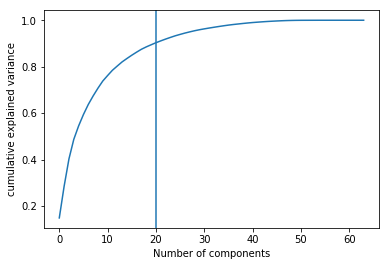

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(20)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca = PCA()

Customer Segmentation

In [89]:
data_cust = pd.read_csv("data_clean.csv")
data_cust.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [90]:
column = data_cust.StockCode.unique()
np.append(column, 'InvoiceNo')

array(['85123A', '71053', '84406B', ..., '90089', '23843', 'InvoiceNo'],
      dtype=object)

In [91]:
df = pd.DataFrame(columns=data_cust.StockCode.unique())

In [ ]:
for d in data_cust:
    df_temp = pd.DataFrame([d.InvoiceNo])
    df.insert(idx, col_name, value)
    df[d.StockCode] = 1 

In [96]:
df.append(pd.DataFrame([]))

,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879,...,23562,23561,90214F,90214O,90214T,90214U,90214W,90214Z,90089,23843


In [97]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [98]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

In [101]:
gb = GaussianNB()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [113]:
digits_gb_score = cross_val_score(gb, digits.data, digits.target, cv=10)
digits_kn_score = cross_val_score(gb, digits.data, digits.target, cv=10)
digits_dt_score = cross_val_score(gb, digits.data, digits.target, cv=10)
digits_dt_score

array([0.76756757, 0.81967213, 0.89502762, 0.71111111, 0.72625698,
       0.84357542, 0.8547486 , 0.86516854, 0.8079096 , 0.8125    ])

In [110]:
vot_hard = VotingClassifier(estimators=[('DT',dt),('GB',gb),('KN',kn)],
                        voting='hard')
vot_hard.fit(digits.data, digits.target)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [109]:
vot_soft = VotingClassifier(estimators=[('DT',dt),('GB',gb),('KN',kn)],
                        voting='soft')
vot_soft.fit(digits.data, digits.target)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [111]:
digits_vot_score = cross_val_score(vot_hard, digits.data, digits.target, cv=10)

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\sk

In [112]:
digits_vot_score

array([0.88108108, 0.94535519, 0.9558011 , 0.89444444, 0.90502793,
       0.95530726, 0.96648045, 0.93258427, 0.89265537, 0.91477273])

In [114]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=100)
bag.fit(digits.data, digits.target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [115]:
cross_val_score(bag, digits.data, digits.target, cv=10)

array([0.82702703, 0.89071038, 0.80110497, 0.76666667, 0.82681564,
       0.84357542, 0.86592179, 0.84831461, 0.81355932, 0.82954545])

In [117]:
bag1 = BaggingClassifier(KNeighborsClassifier(), max_samples=100)
bag1.fit(digits.data, digits.target)
cross_val_score(bag1, digits.data, digits.target, cv=10)

array([0.91351351, 0.94535519, 0.9281768 , 0.88888889, 0.92178771,
       0.92178771, 0.9273743 , 0.93820225, 0.87570621, 0.92613636])

In [120]:
bag2 = BaggingClassifier(GaussianNB(), max_samples=100)
bag2.fit(digits.data, digits.target)
cross_val_score(bag2, digits.data, digits.target, cv=10)

array([0.83243243, 0.87431694, 0.85082873, 0.76666667, 0.80446927,
       0.76536313, 0.84916201, 0.88202247, 0.75706215, 0.80681818])

In [122]:
ada = AdaBoostClassifier(GaussianNB())
ada.fit(digits.data, digits.target)
cross_val_score(ada, digits.data, digits.target, cv=10)

array([0.82162162, 0.8852459 , 0.90607735, 0.74444444, 0.73743017,
       0.8603352 , 0.88826816, 0.86516854, 0.75706215, 0.81818182])

In [125]:
ada1 = AdaBoostClassifier(DecisionTreeClassifier())
ada1.fit(digits.data, digits.target)
cross_val_score(ada1, digits.data, digits.target, cv=10)

array([0.82702703, 0.83606557, 0.79558011, 0.82222222, 0.79329609,
       0.87709497, 0.8603352 , 0.80898876, 0.83615819, 0.8125    ])

In [126]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(digits.data, digits.target)
cross_val_score(rf, digits.data, digits.target, cv=10)

array([0.86486486, 0.96721311, 0.90607735, 0.91111111, 0.89944134,
       0.96648045, 0.96648045, 0.96067416, 0.86440678, 0.90340909])

In [128]:
grad = GradientBoostingClassifier(n_estimators=10)
grad.fit(digits.data, digits.target)
cross_val_score(grad, digits.data, digits.target, cv=10)

array([0.81621622, 0.91256831, 0.82872928, 0.83888889, 0.8547486 ,
       0.92178771, 0.94972067, 0.87640449, 0.81920904, 0.82954545])